# Model Evaluation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('data/historical_loan.csv')

In [8]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


## Preprocessing the Data

In [9]:
df.years = df.years.fillna(np.mean(df.years))

In [10]:
#Load the preprocessing module
from sklearn import preprocessing

In [11]:
categorical_variables = df.dtypes[df.dtypes=="object"].index.tolist()

In [12]:
categorical_variables

['grade', 'ownership']

In [13]:
for i in categorical_variables:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[i]))
    df[i] = lbl.transform(df[i])

In [14]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.0,3,19200.0,24
1,1,6500,0,2.0,0,66000.0,28
2,0,2400,0,2.0,3,60000.0,36
3,0,10000,2,3.0,3,62000.0,24
4,1,4000,2,2.0,3,20000.0,28


In [15]:
X = df.iloc[:,1:8]

In [16]:
y = df.iloc[:,0]

## Accuracy Metrics

- Misclassification Rate
- Confusion Matrix
- Precision & Recall
- ROC
- AUC

#### Misclassification Rate

The most basic evaluation metric is accuracy score. if $\hat{y}_i$ is the predicted value of the i-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions over $n_\text{samples}$ is defined as

$$ accuracy(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $$

#### Confusion Matrix
Confusion matrix evaluate the quality of the output of a classifier.

|   | Predicted - Yes  | Predicted - No  |
|--:|---|---|
| Actual - Yes  |  True Positive | False Negative  |
| Actual - No |  False Positive | True Negative  |

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

#### Precision
The precision is the ratio TP / (TP + FP) where TP
is the number of true positives and FP the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall
The recall is the ratio TP / (TP + FN) where TP is the number of true positives and FN the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

#### Receiver Operating Curve (ROC)

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings.”

- **True Positive Rate** (sensitivity) -> TPR = TP / (TP+FN)
- **False Positive Rate** (1- specifity) -> FPR = FP / (FP+TN)


#### Area Under Curve (AUC)
The AUC computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.



## How do choose the Error Metric

- What is the objective for the problem?
- Which error metric would be best help address that problem?

## Build Models and Evaluate

In [17]:
from sklearn import tree
from sklearn import metrics

In [18]:
def model_evaluation(data, target, model, model_name):
    model_fit = model.fit(data, target)
    pred = model_fit.predict(data)
    proba = model_fit.predict_proba(data)
    
    fpr, tpr, thresholds = metrics.roc_curve(target, proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    
    print("Model: %s" % model_name)

    # Scores for the model
    print("accuracy: %.3f" % metrics.accuracy_score(target, pred))
    print("recall: %.3f" % metrics.precision_score(target, pred))
    print("precision: %.3f" % metrics.recall_score(target, pred))
    print("confusion_matrix:")
    print(metrics.confusion_matrix(target, pred))
    print("auc: %.3f" % metrics.auc(fpr, tpr))
    
    # ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return roc_auc

## Build Models and Evaluate

### Benchmark Model

Our benchmark model is that there is only "no" in the model. We need to improve on this to realistically do better.

In [19]:
benchmark = tree.DecisionTreeClassifier(max_depth = 1)

In [20]:
benchmark

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Model: benchmark
accuracy: 0.632
recall: 0.634
precision: 0.544
confusion_matrix:
[[2869 1161]
 [1686 2011]]
auc: 0.628


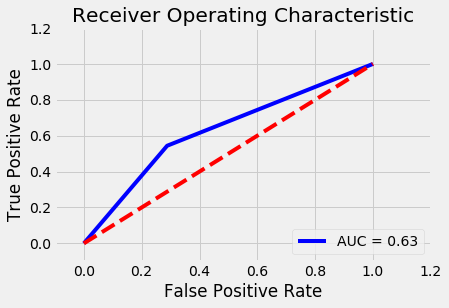

0.62793261386235633

In [21]:
model_evaluation(X, y, benchmark, "benchmark")

### Decision Tree Model - Shallow

In [22]:
Shallow = tree.DecisionTreeClassifier(max_depth=10)

In [23]:
Shallow

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Model: Shallow
accuracy: 0.749
recall: 0.744
precision: 0.725
confusion_matrix:
[[3107  923]
 [1018 2679]]
auc: 0.838


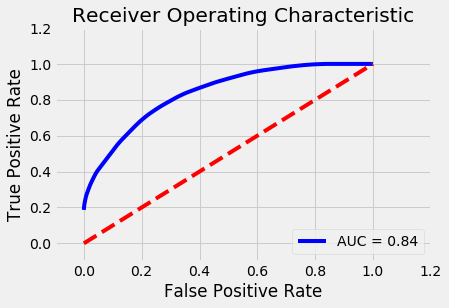

0.83778122023691659

In [24]:
model_evaluation(X, y, Shallow, "Shallow")

### Decision Tree Model - Full

In [25]:
Full = tree.DecisionTreeClassifier()

In [26]:
Full

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Model: Full
accuracy: 1.000
recall: 1.000
precision: 0.999
confusion_matrix:
[[4030    0]
 [   2 3695]]
auc: 1.000


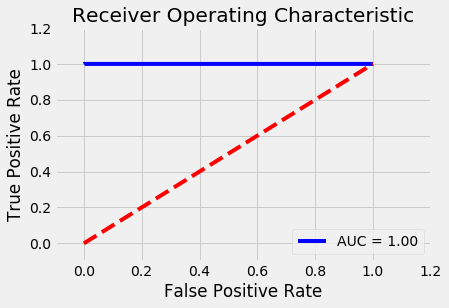

0.99999986576199196

In [27]:
model_evaluation(X, y, Full, "Full")

## K-Fold Cross Validation

So far we have been evaluating our metrics on the train data. However, there is an important modelling lesson: you should never evaluate a model on the same data it was fit to because it’s going to seem more confident. Instead, it’s better to divide the data up and use one piece to fit the model and the other piece to evaluate it. A popular technique for this is called **k-fold cross validation**. You randomly hold out x% of the data and fit the model to the rest. You need to repeat this a few times because of random variation.

![](img/cross_validation.png)

### Update the ROC using k-fold validation

In [28]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [29]:
def model_evaluation_crossval(data, target, model, model_name): 
    data = np.array(data)
    target = np.array(target)
    cv = StratifiedKFold(n_splits=5)

    # Create the color options  
    cmap = plt.get_cmap('viridis')
    indices = np.linspace(0, cmap.N, 5)
    colors = [cmap(int(i)) for i in indices]
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    
    # intiate plot
    plt.figure(figsize=(8, 8))
    
    i = 0
    for (train, test) in cv.split(data, target):
        print(train, test)
        probas_ = model.fit(data[train], target[train]).predict_proba(data[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(target[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=colors[i],
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i = i + 1
    
    # ROC Curve
    mean_tpr /= cv.get_n_splits(data, target)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random')

    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


[1410 1412 1414 ..., 7724 7725 7726] [   0    1    2 ..., 1737 1738 1741]
[   0    1    2 ..., 7724 7725 7726] [1410 1412 1414 ..., 3522 3527 3528]
[   0    1    2 ..., 7724 7725 7726] [2801 2802 2803 ..., 5132 5134 5135]
[   0    1    2 ..., 7724 7725 7726] [4168 4171 4172 ..., 6416 6417 6418]
[   0    1    2 ..., 6416 6417 6418] [5883 5884 5885 ..., 7724 7725 7726]


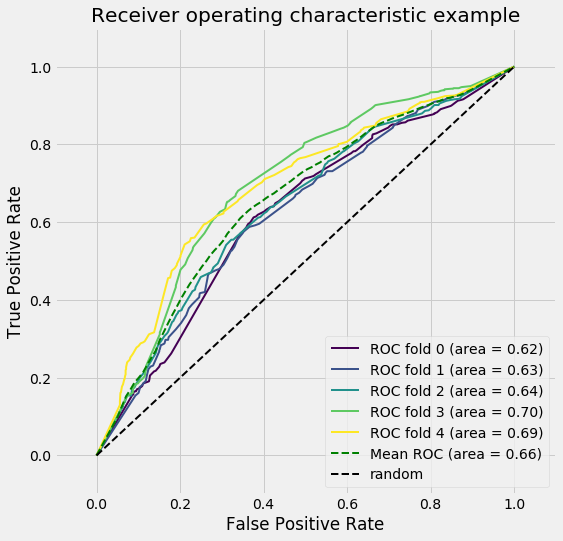

In [30]:
model_evaluation_crossval(X, y, Shallow, "Shallow")

### Exercise 0: Update the model_evaluation function to work on k-fold cross-validation

### Exercise 1: Find the ROC curve for balancing the classes

### Exercise 2: Plot the auc values for  maximum depth (2 to 10)

### Exercise 3: Plot the auc values for different minimum sample split (2 to 8)